# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, power_transform
from scipy.stats import zscore
import os
import scipy as stats
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('database_ IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


The dataset contains the detalis of Global Power Plant. This dataset is comprised of 27 columns including two target variables capacity_mw and primary_fuel(Fuel_Type) where we need to predict both capacity_mw and Fuel Type.

In [3]:
# Let's define primary_fuel as Fuel_Type to understand the dataset in better way
df.rename(columns={'primary_fuel':'Fuel_Type'},inplace=True)

In [4]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


# Exploratory Data Analysis (EDA)

In [5]:
# Checking the shape of dataset 
df.shape

(907, 27)

The dataset contains 907 rows and 27 columns

In [6]:
# Checking the type of dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
Fuel_Type                    object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

The dataset contains two diiferent types of data as object and float

In [7]:
# Checking number of unique values in each column
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
Fuel_Type                     8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Columns having 0 unique values:

other_fuel3

wepp_id

generation_gwh_2013

generation_gwh_2019

estimated_generation_gwh

Column having only 1 unique value: 
    
country

country_long

other_fuel2

year_of_capacity_data

generation_data_source

It means these columns have filled with repetative same data or some NAN values. we will drop these column further.

In [8]:
# To get good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   Fuel_Type                 907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Above dataset gives an overview that 15 columns are float dtype and 12 columns are object dtype

# Feature Selection

In [9]:
# Checking the count of the country
df["country"].value_counts()

IND    907
Name: country, dtype: int64

There is only one country in the dataset so we can drop this as it has nothing to do with our prediction also we can drop the column country_long on this basis.

In [10]:
df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [11]:
# Dropping irrelevant columns
df.drop(columns=["name","other_fuel2", "year_of_capacity_data","generation_gwh_2013","generation_gwh_2019","generation_data_source","other_fuel3","wepp_id","estimated_generation_gwh"], axis=1, inplace=True)

In [12]:
# Checking the count of gppd_idnr
df["gppd_idnr"].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

The column gppd_idnr also contains the unique ID of the power plant, so we can drop this column as well.

In [13]:
df.drop("gppd_idnr",axis=1,inplace=True)

In [14]:
# Checking null values in the dataframe
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
Fuel_Type                0
other_fuel1            709
commissioning_year     380
owner                  565
source                   0
url                      0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

There are huge missing values present in most of the columns. We will fill them using imputation techniques after checking skewness in these columns.

The columns owner has more than 65% of null values also it may not important for prediction, so we can drop it.

In [15]:
df.drop("owner",axis=1,inplace=True)

<AxesSubplot:>

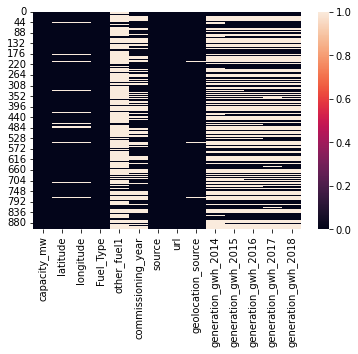

In [16]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

The white lines in the heat map which indicates the missing values in the dataset.

In [17]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

In [18]:
# Let's check the mean of the lattitude
df['latitude'].mean()  # we will rwplace the null values using this mean

21.19791811846691

In [19]:
# Filling missing values in lattitude using mean
df["latitude"] = df["latitude"].fillna(df["latitude"].mean())

In [20]:
# let's check the mode of other_fuel1 
df["other_fuel1"].mode()  # we will fill the null values using its mode

0    Oil
Name: other_fuel1, dtype: object

In [21]:
# let's check the mode of geolocation_source columns
df["geolocation_source"].mode()  # we will fill the null values using its mode

0    WRI
Name: geolocation_source, dtype: object

So the modes of other_fuel1 and geolocation_source are Oil and WRI respectively which means they have more value counts in those columns. Let's fill the null values of categorical columns by their respective modes

In [22]:
# Replacing the null valuee by its mode Oil
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])

In [23]:
# Filling null values by its mode WRI
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

The columns longitude, commissioning year, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016 and generation_gwh_2017 are numerical type and have huge outliers and skewness so will replace missing values using median method.

In [24]:
# Filling null values using their median values
df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())
df["generation_gwh_2014"] = df["generation_gwh_2014"].fillna(df["generation_gwh_2014"].median())
df["generation_gwh_2015"] = df["generation_gwh_2015"].fillna(df["generation_gwh_2015"].median())
df["generation_gwh_2016"] = df["generation_gwh_2016"].fillna(df["generation_gwh_2016"].median())
df["generation_gwh_2017"] = df["generation_gwh_2017"].fillna(df["generation_gwh_2017"].median())
df["generation_gwh_2018"] = df["generation_gwh_2018"].fillna(df["generation_gwh_2018"].median())

In [25]:
# Let's check the  null values if there any
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
Fuel_Type              0
other_fuel1            0
commissioning_year     0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

We have removed the null values using imputaion methods and the data is now clean. So we can move further.

<AxesSubplot:>

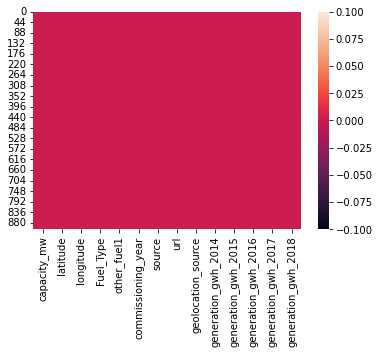

In [26]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

It is clear that there are no missing values

In [27]:
# Checking how many columns are there in the dataset
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'Fuel_Type', 'other_fuel1',
       'commissioning_year', 'source', 'url', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

Above are the columns present in the dataset.

In [28]:
# Checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [29]:
# Checking the list of counts of primary_fuel
df['Fuel_Type'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64

These are the list of the values in the column primary_fuel.

In [30]:
# Checking the uniqueness of primary_fuel
df["Fuel_Type"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

These are the unique classes present in the primary_fuel column.

# Feature Extraction

In [31]:
# Checking the list of counts of commissioning_year
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [32]:
# Let's extract power plant age from commissioning year by subtracting it from the year 2018
df["Power_plant_age"] = 2018 - df["commissioning_year"]
df.drop(columns=["commissioning_year"], inplace = True)

I have extracted Power plant age from commissioning year and dropped commissioning year columns. From Power plant age we can get to know how old are the power plants.

In [33]:
# Let's check the data frame after feature engineering 
df.head()

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


The column URL is also irrelevant with respect to our target variables. So i am dropping this column

In [34]:
df.drop("url",axis=1,inplace=True)

In [35]:
# Checking wheather the dataset contains any space
df.loc[df['capacity_mw']==" "]

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age


It seems that there are no spaces in the dataset.

# Description of Dataset

In [36]:
# Statistical summary of dataset
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,91.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present.

The counts of columns are same which means there are no missing values present in the dataset.

The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.

From the difference between maximum and 75% percentile we can infer that there are huge outliers present in most of the columns.

The minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and standard deviation.

Before visualizing the data, let's Separate categorical and numerical columns

In [37]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)


['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']


These are the categorical columns in the given dataset

In [38]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


These are the numerical columns in the dataset

# Data Visualization

# Univariate Analysis

# Plotting categorical columns

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: Fuel_Type, dtype: int64


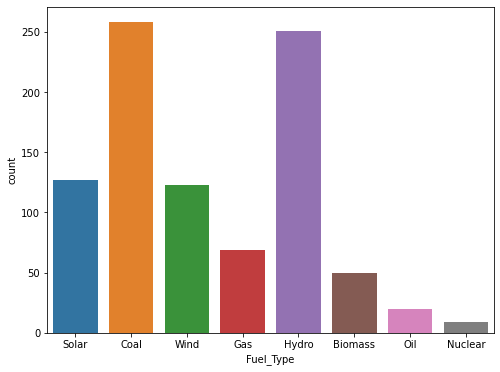

In [39]:
# Visualizing the types of fuel in primary_fuel
print(df["Fuel_Type"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df["Fuel_Type"])
plt.show()

The count plot shows the energy source used in primary electricity generation . Here using the source Coal(thermal) generates more electricity followed by Hydro(water). Also the energy souce Nuclear gnerates very less electricity compare to others. The data is not balanced so will balance the data later.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


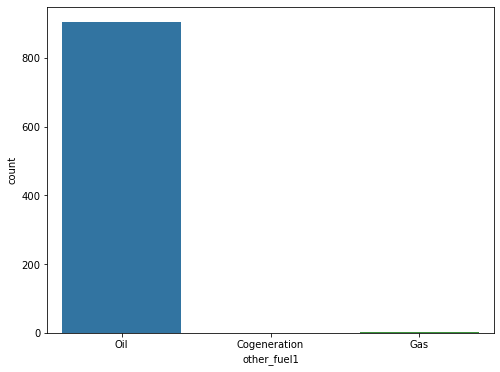

In [40]:
# Visualizing the counts of other fuel
print(df["other_fuel1"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df["other_fuel1"])
plt.show()

There are 3 uniquevalues in other_fuel1. Here as we can see the count of oil is high compare to Cogeneration and Gas.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


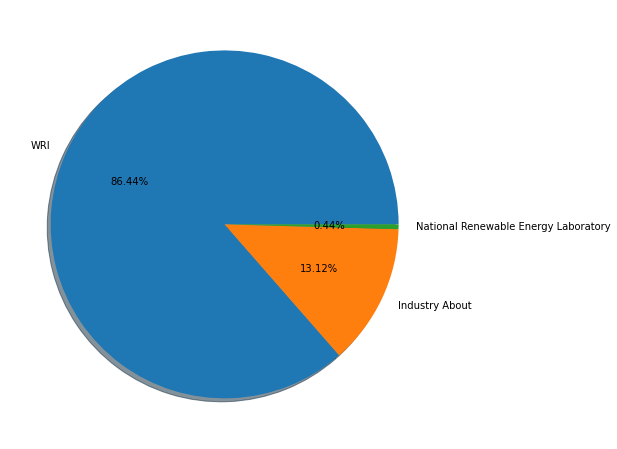

In [41]:
# Visualizing the counts of geolocation source
print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

As the plot shows the geolocation source World Resources Institute(WRI) has highest counts which means WRI gives the more geolocation information compare to other two sources.

# Distribution of skewness

# Plotting numerical columns

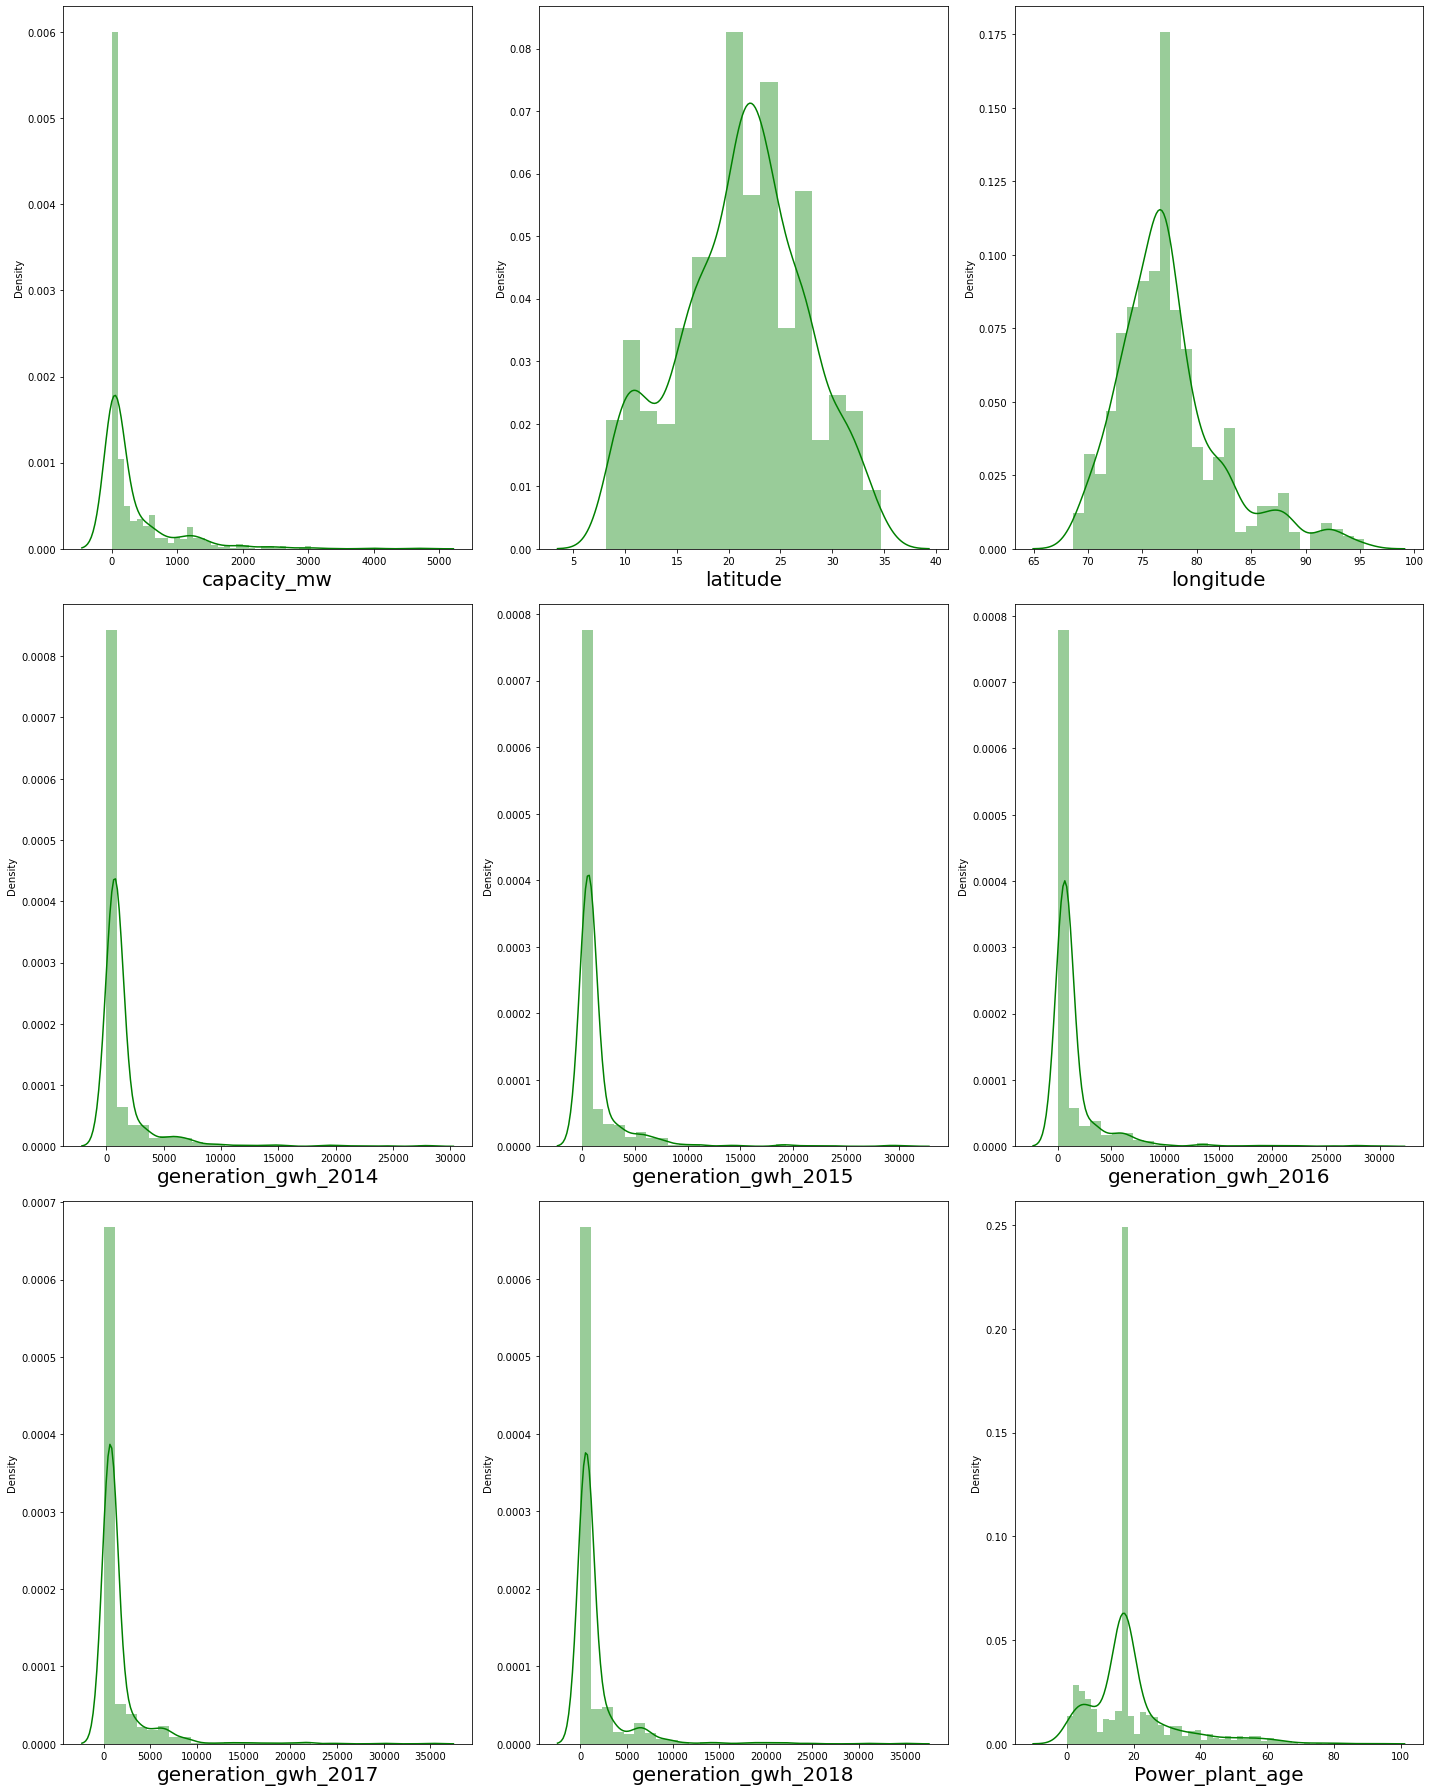

In [42]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="g")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above distribution plots we can observe that the data is not normally distributed in all the columns except latitude and longitude.

In most of the columns the mean is greater than the median which means they are skewed to right.

We will remove these skewness in all the columns except the label in the later part.

# Bivariate Analysis

# Comparing target variable capacity_mw with features

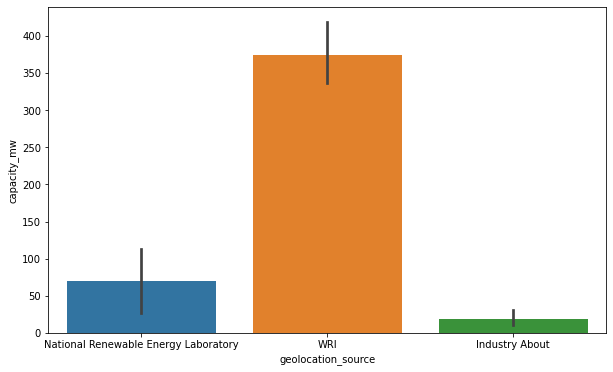

In [43]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

The capacity of geolocation source WRI is maximum which has capacity more tahn 350 mega watts. The geolacation source Industry About has less capacity.

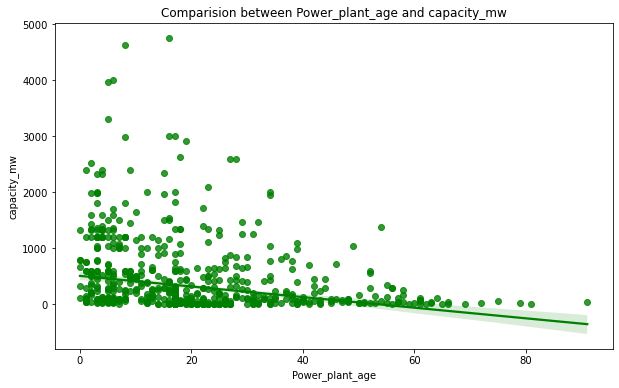

In [44]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = "g");

From the plot we can observe that there is negative linear relationship between feature and label also we can infer that the capacity of older power plants is very less compared to the power plants which are started recently.

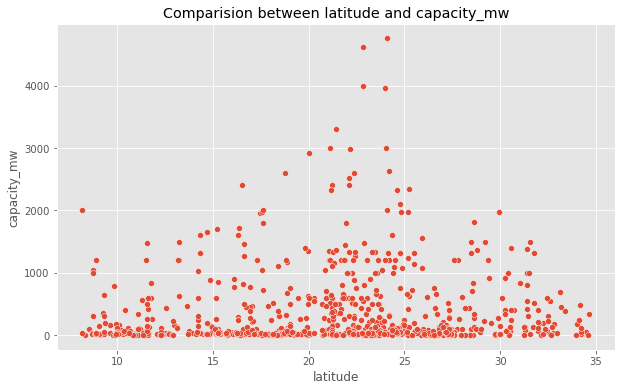

In [45]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df["capacity_mw"]);

The plot shows that there is no linear relation between latitude and capacity of the power plant. We can notice the capacity of power plant is very less in this case also we can see some outliers present here.

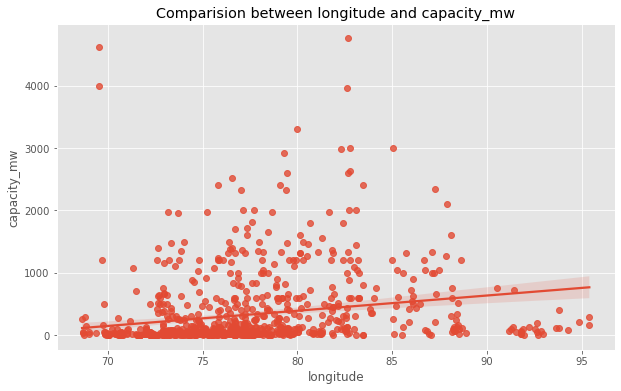

In [46]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw')
sns.regplot(df['longitude'],df["capacity_mw"]);

There is very weak linear relation between longitude and capacity. Here the longitude ranges from 74-82 has more capacity upto 2000. And we can also observe the presence of outliers.

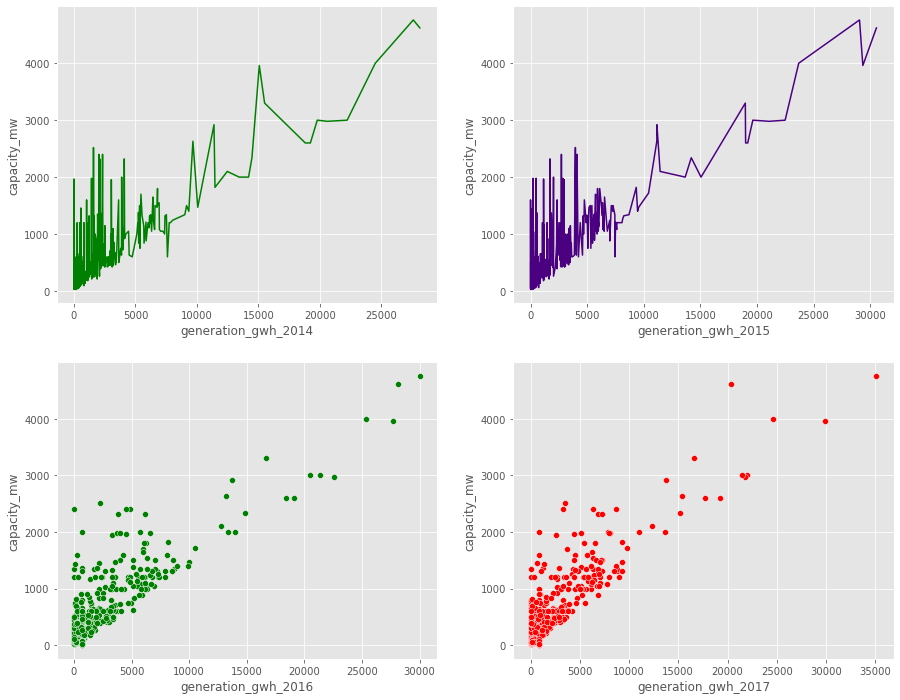

In [47]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking attrition level in Monthlyrate
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking attrition level in Monthlyincome
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()

Observation:

There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.

The plot shows how the electricity generation reported for the years 2014,2015,2016,2017 have high capacity of above 1000mw. Also power generation growth is more than 5000gwh in all the years.

As the electricity generation growth increases, the capacity of plant is also increasing moderately.

# Comparing the target variable Fuel Types with other features

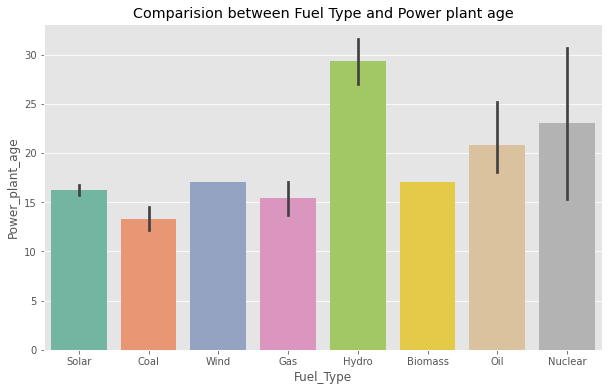

In [48]:
#Lets check how the poer plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and Power plant age")
sns.barplot(x = "Fuel_Type", y = "Power_plant_age", data = df,palette="Set2")
plt.show()

From the plot we can observe that most of old power plants uses Hydro(water) to generate the electricity followed by Nuclear and Oil.

The power plants which are recently constructed uses coal, Solar and Gas to generate the power.

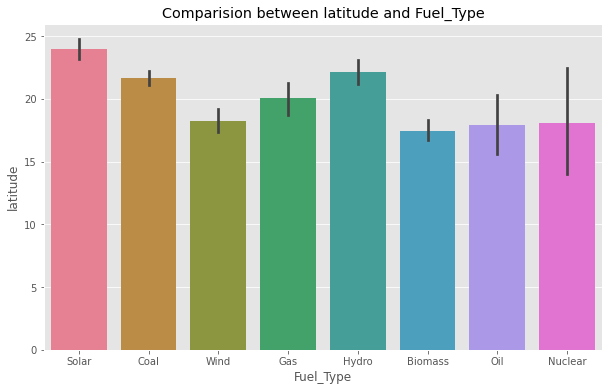

In [49]:
# Let's check how the fuel type is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between latitude and Fuel_Type')
sns.barplot(df['Fuel_Type'],df["latitude"],palette="husl");

The fuel type Solar has high latitude of above 20 followed by Hydro, Coal and Gas . Apart from these types others have less latitude.

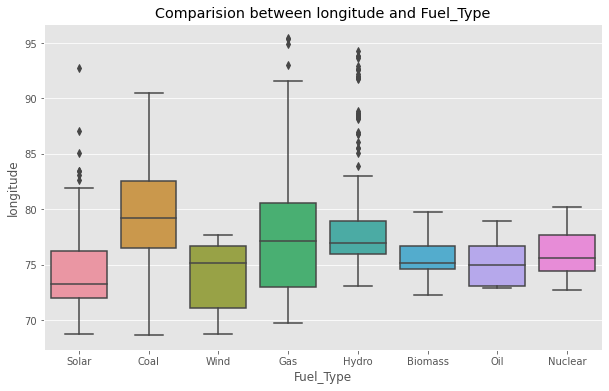

In [50]:
# Let's check how the fuel type is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and Fuel_Type')
sns.boxplot(df['Fuel_Type'],df["longitude"]);

The fuel type Gas has high longitude followed by Hydro, Solar and Coal. Other fuel types have very less longitude.

# Checking the relation between targets

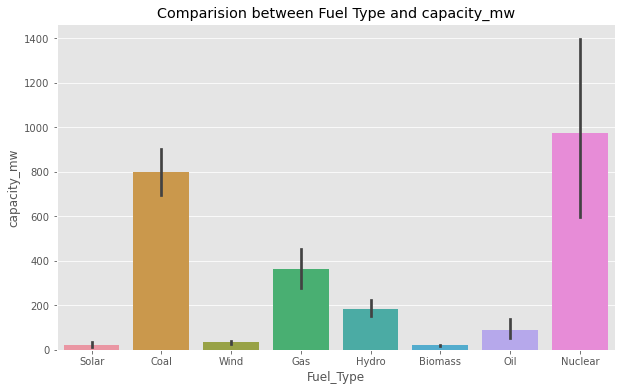

In [51]:
#Lets check the relation between Fuel Type and capacity_mw
plt.figure(figsize = (10,6))
plt.title("Comparision between Fuel Type and capacity_mw")
sns.barplot(x = "Fuel_Type", y = "capacity_mw", data = df)
plt.show()

The plot shows that the capacity of generating electricity is high in Nuclear followed by Coal. Also the electricity generating capacity is very less in Solar, Biomass, Wind and other plants.

# Outliers

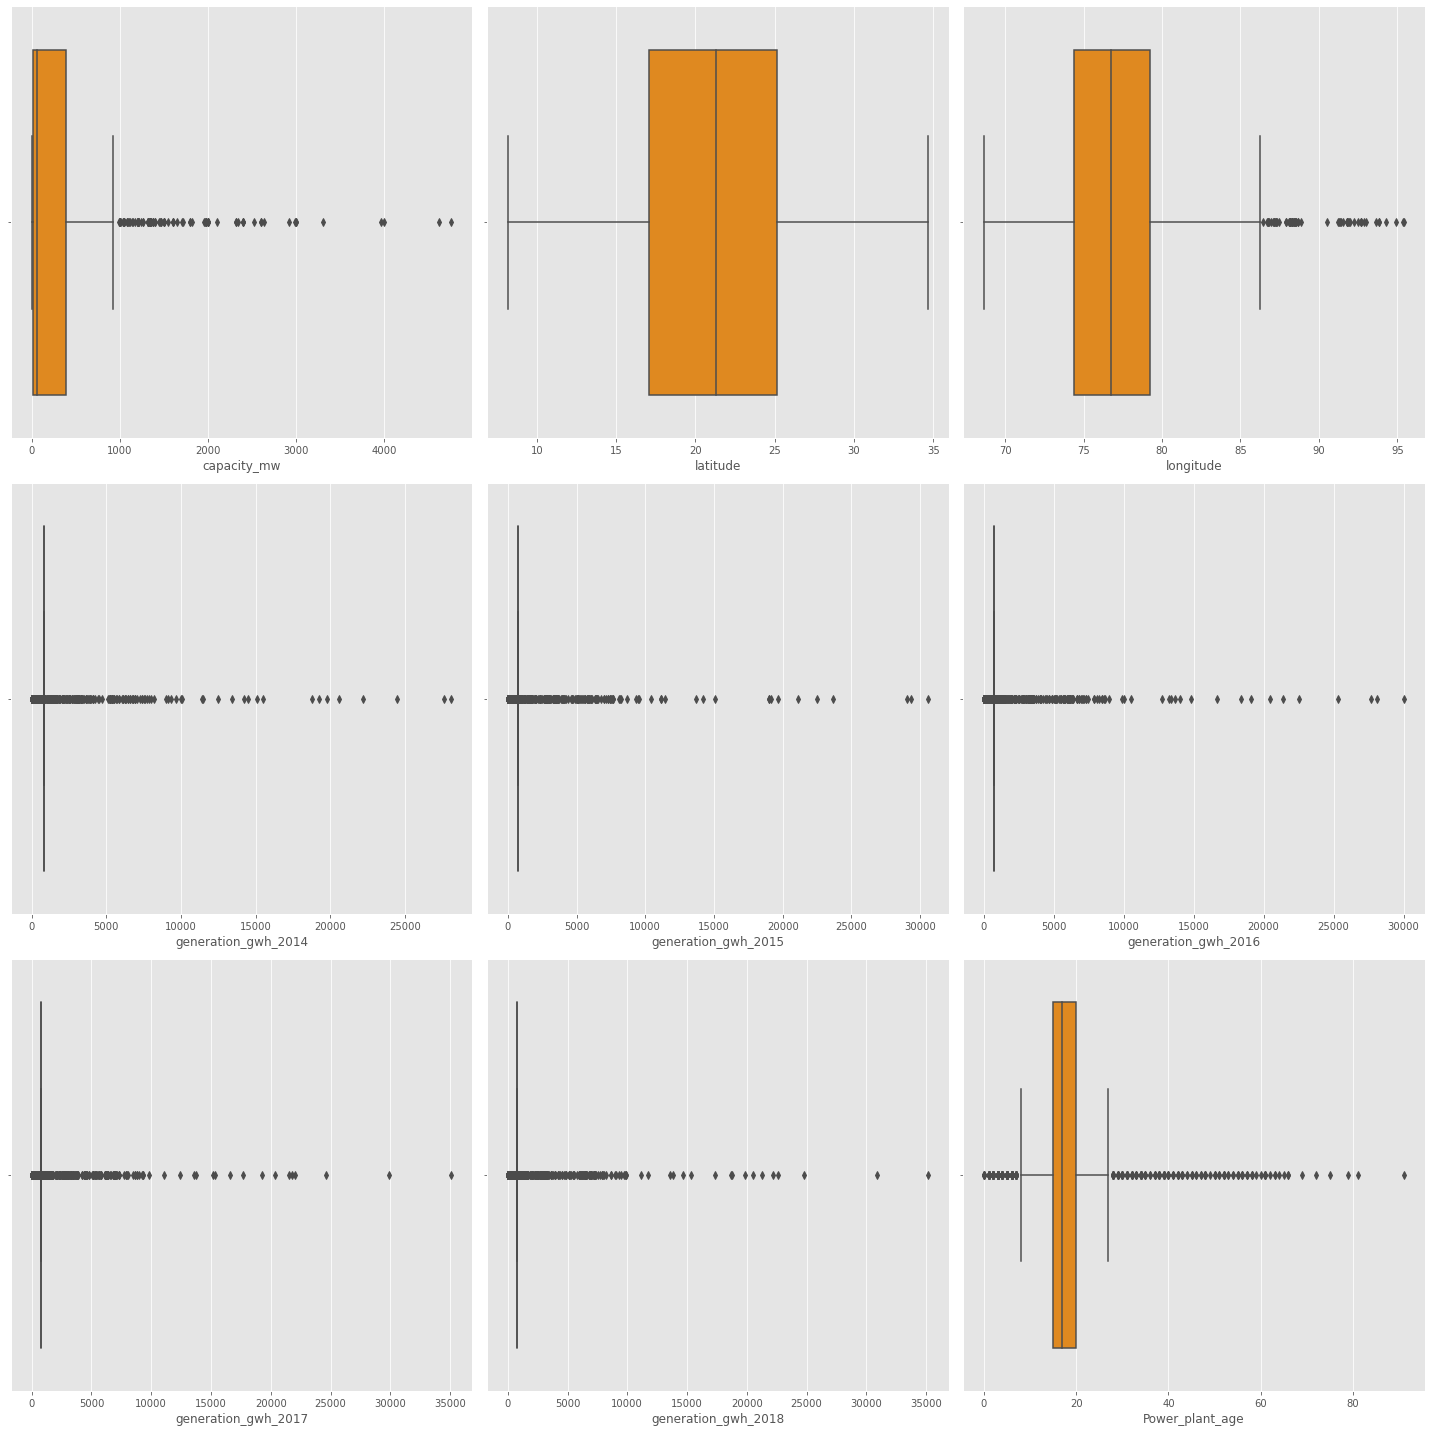

In [52]:
# Identifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

We can notice the outliers present in all the columns except latitude. Even target column has outliers but no need to remove it. Let's remove outliers using Zscore method.

# Removing outliers

# 1. Zscore method

In [53]:
# Features containing outliers
features = df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018', 'Power_plant_age']]

In [54]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))

z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,0.308963,1.313265
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699


Outliers are removed from dataset

In [55]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [56]:
# Shape of original dataset
df.shape

(907, 13)

Before removing the outliers we had 907 rows and 13 columns in our dataset.

In [57]:
# Shape of new dataframe
new_df.shape

(851, 13)

After removing the outliers we have 851 rows and 13 columns.

In [58]:
# Checking the the data loss
data_loss = (907-851)/907*100
data_loss

6.174200661521499

The data loss is 6.17% which is less than 10% and feasible.

# 2. IQR (Inter Quantile Range) method

In [59]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [60]:
df1.shape

(420, 13)

Using IQR method the dataframe has 420 rows and 13 columns.

In [61]:
# Let's check the dataloss
data_loss = (907-420)/907*100
data_loss

53.69349503858876

The data loss is 53% which is very high. so considering Z score method for outliers removal.

# Encoding the categorical columns using Label Encoding

In [62]:
categorical_col = ['Fuel_Type', 'other_fuel1', 'source', 'geolocation_source']

In [63]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [64]:
new_df[categorical_col]

,Fuel_Type,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


I have encoded the categorical columns using label encoding method.

# Correlation between the target variable and features using HEAT map

In [65]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,Fuel_Type,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
Fuel_Type,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


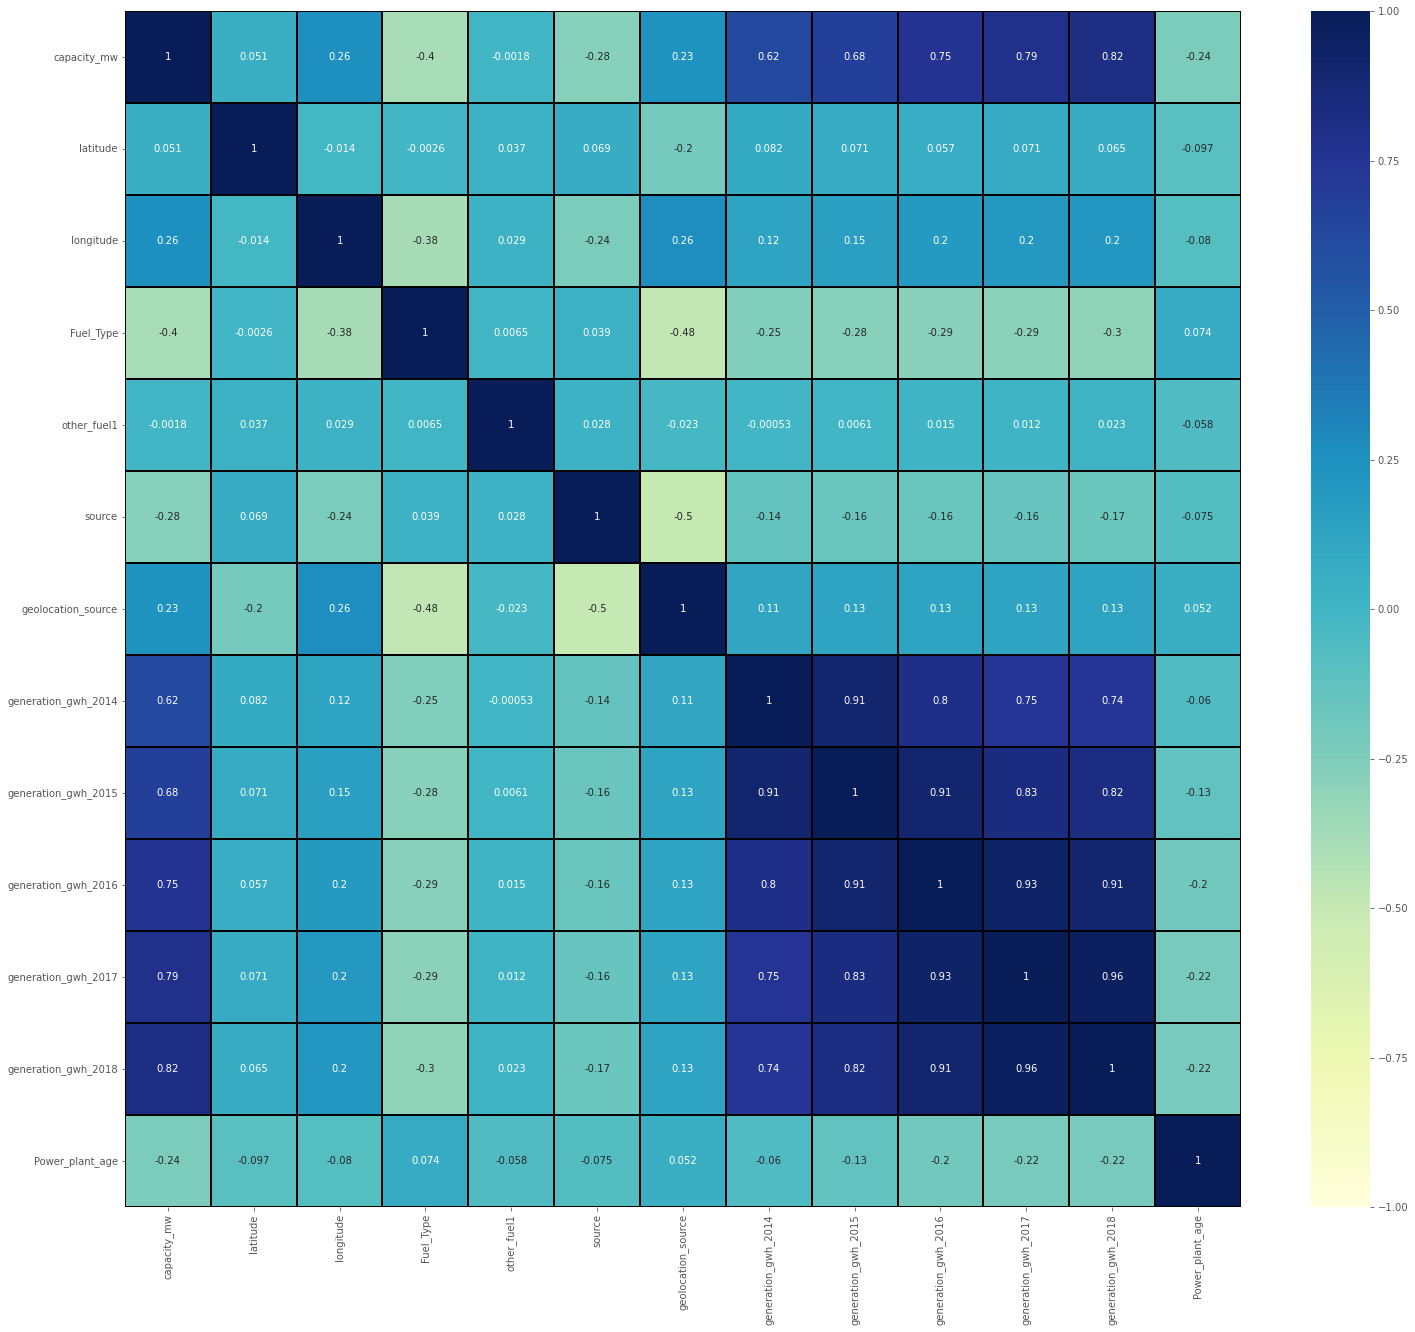

In [66]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':10},cmap="YlGnBu")
plt.yticks(rotation=0);

This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

Correlation between capacity_mw and features

1.The label capacity_mw is highly positively correlated with the features generation_gwh_2018,generation_gwh_2017, generation_gwh_2016, 2.generation_gwh_2015, generation_gwh_2014. And the label is negatively correlated with the features Fuel_Type, source and Power_plant_age. 3The columns other_fuel1 and latitude have no relation with the label, so we can drop them.

Correlation between Fuel_Type and features

1The label Fuel_Type is less correlated with Power_plant_age and source. 2The label is negatively correlated with geolocation_source, longitude, capacity_mw, and all generation_gwh years.

From the heat map we can notice most of the features are highly correlated with each other which leads to multicollinearity problem. So will try to solve this problem by Checking VIF value before building our models.

Also the features other_fuel1 and latitude have very very less correlation with both the labels. Let's drop those columns.

# Visualizing the correlation between capacity_mw and features using bar plot

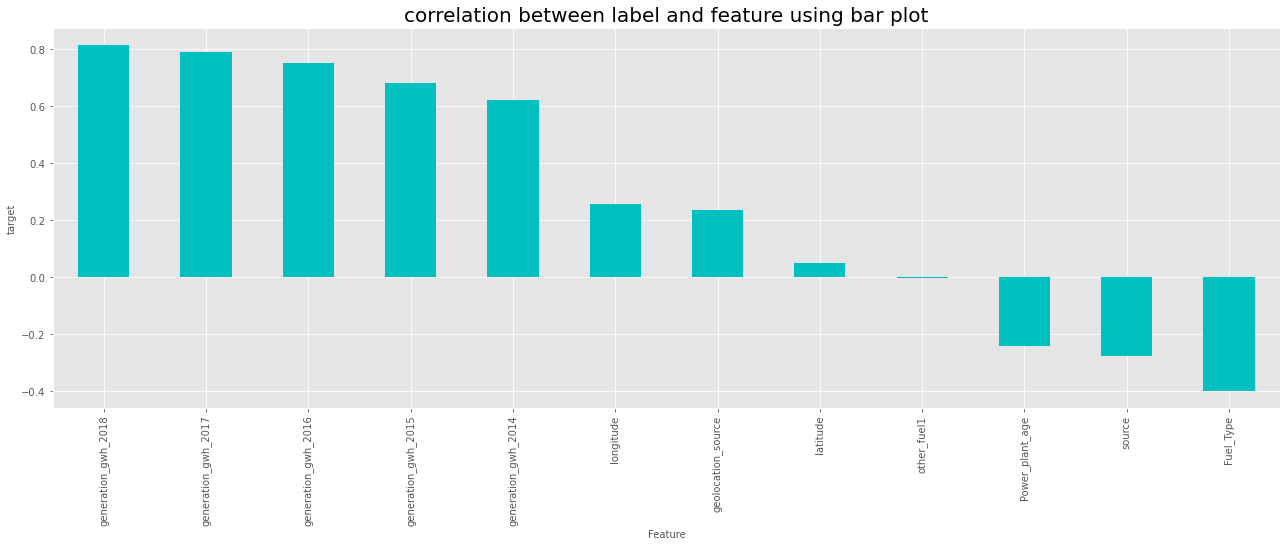

In [67]:
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

The bar plot to check the correlation between capacity_mw and features. Here we can easily notice the positive and negative correlation between the features and the label.

# Visualizing the correlation between Fuel_Type and features using bar plot

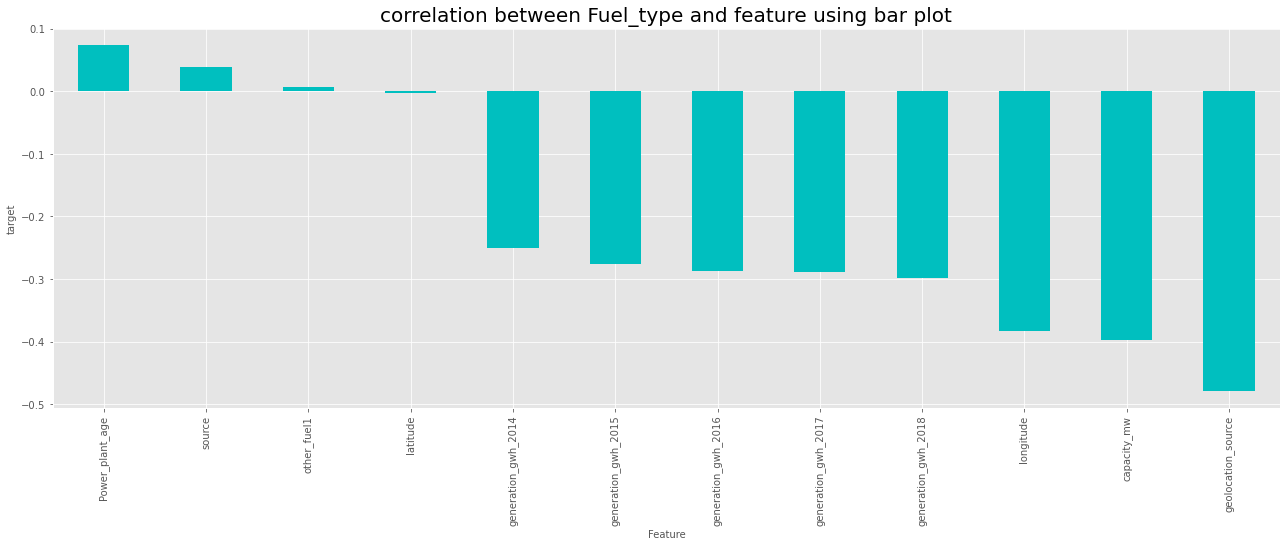

In [68]:
plt.figure(figsize=(22,7))
new_df.corr()['Fuel_Type'].sort_values(ascending=False).drop(['Fuel_Type']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between Fuel_type and feature using bar plot',fontsize=20)
plt.show()

The bar plot to check the correlation between Fuel_Type and features. Here we can easily notice the positive and negative correlation between the features and the label.

From both the bar plots we can observe that the columns other_fuel1 and latitude have very less correlation with both the labels capacity_mw and Fuel_Type. Let's drop those columns.

In [69]:
# Dropping irrwlevant columns
new_df.drop("other_fuel1",axis=1,inplace=True)
new_df.drop("latitude",axis=1,inplace=True)

In [70]:
new_df.head()

,capacity_mw,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


# 1. Prediction for capacity_mw

# Separating the features and label variables into x and y

In [71]:
x = new_df.drop("capacity_mw", axis=1)
y = new_df["capacity_mw"]

In [72]:
# Dimension of x
x.shape

(851, 10)

In [73]:
# Dimension of y
y.shape

(851,)

# Checking for skewness

In [74]:
# Checking the skewness
x.skew()

longitude              0.945877
Fuel_Type              0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

The following columns have skewness more than +0.5 and -0.5.

longitude generation_gwh_2014 generation_gwh_2015 generation_gwh_2016 generation_gwh_2017 generation_gwh_2018 Power_plant_age

Also the columns source and geolocation_source are categorical so no need to remove skewness in these columns.

# Removing skewness using yeo-johnson method

In [75]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [76]:
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [77]:
# Checking skewness after using yeo-johnson ethod
x.skew()

longitude             -0.000128
Fuel_Type              0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

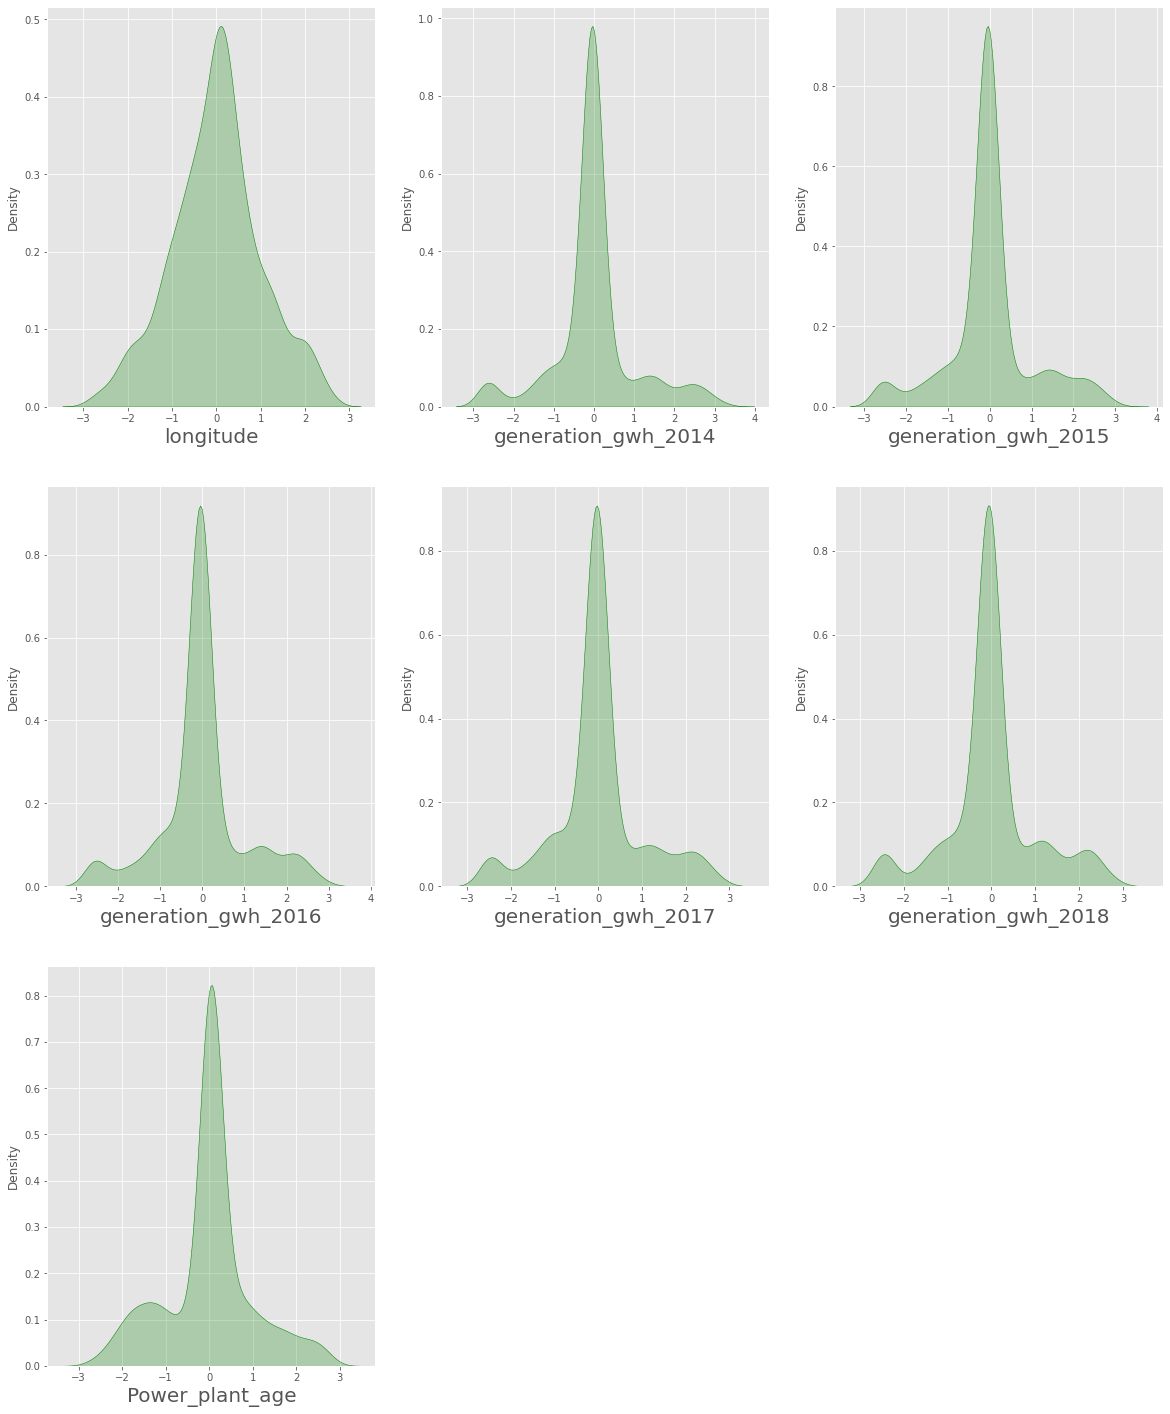

In [78]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but the skewness has been almost reduced in all the columns.

# Feature Scaling using Standard Scalarization

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


I have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns.

# Checking VIF(Variance Inflation Factor) values

In [80]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.309948,longitude
1,1.682645,Fuel_Type
2,1.503721,source
3,1.875750,geolocation_source
4,3.603333,generation_gwh_2014
5,6.182235,generation_gwh_2015
6,9.957776,generation_gwh_2016
7,9.750143,generation_gwh_2017
8,8.951489,generation_gwh_2018
9,1.102659,Power_plant_age


The columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models.

In [81]:
# DataFrame after preprocessing and data cleaning
x.head()

,longitude,Fuel_Type,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


The dataframe after cleaning and preprocessing.

We have done with the preprocessing and data cleaning. Now let's move to build the model.

# Modeling

# Finding best random state

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [83]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.8674043399455369  on Random_state  185


We are getting the maximum R2 score as 85% on the random state 185.

# Creating new train test split

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Regression Algorithms

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [86]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('MAE:',metrics.mean_absolute_error(y_test, predRFR))
print('MSE:',metrics.mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))

R2_Score: 0.8704040171752438
MAE: 80.34228350545766
MSE: 24483.942971476354
RMSE: 156.47345772199307


The R2 score value for Random Forest Regressor model is 86.64%.

# Decision Tree Regressor

In [87]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('MAE:',metrics.mean_absolute_error(y_test, predDTR))
print('MSE:',metrics.mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predDTR)))

R2_Score: 0.6866152873601523
MAE: 114.143888671875
MSE: 59206.25983277637
RMSE: 243.32336474900302


The R2 score for Decision Tree Regressor is 67.13%.

# KNeighbors Regressor

In [88]:
# Checking R2 score for Stochastic KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',metrics.mean_absolute_error(y_test, predknn))
print('MSE:',metrics.mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predknn)))

R2_Score: 0.7918940464635293
MAE: 103.55416406249999
MSE: 39316.45246520969
RMSE: 198.28376752828177


The R2 score uisng KNeighbors Regressor is 79.18%.

# GradientBoosting Regressor

In [89]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

R2_Score: 0.8486627808704128
MAE: 90.90818307426315
MSE: 28591.409717082828
RMSE: 169.0899456416106


The R2 score for GradientBoosting Regressor model is 84.87%.

# BaggingRegressor

In [90]:
# Checking R2 score for BaggingRegressor
from sklearn.ensemble import BaggingRegressor
BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR))
print('MAE:',metrics.mean_absolute_error(y_test, predBR))
print('MSE:',metrics.mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predBR)))

R2_Score: 0.866797758394356
MAE: 82.33232348057643
MSE: 25165.256021519264
RMSE: 158.63560767217197


The R2 score for BaggingRegressor is 83.4%.

# Checking the cross validation score

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
# Checking cv score for Random Forest Regressor
print(cross_val_score(RFR,x,y,cv=5).mean())

0.7798814661898449


In [93]:
# Checking cv score for Decision Tree Regressor
print(cross_val_score(DTR,x,y,cv=5).mean())

0.5925144045512047


In [94]:
# Checking cv score for KNN Regressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.7246075187248919


In [95]:
# Checking cv score for Gradient Boosting Regressor

print(cross_val_score(GB,x,y,cv=5).mean())

0.7516022497676595


In [96]:
# Checking cv score for Bagging Regressor
cr=cross_val_score(BR,x,y,cv=5).mean()
print(cross_val_score(BR,x,y,cv=5).mean())

0.754184703084096


From the above observation, the difference between R2 score and the cross validation score we conclude that Random Forest Regressor as our best fitting model. Let's increse the accuracy of the model by usiing hyper parameter tuning.

# Hyper parameter tuning

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
#RandomForestRegressor
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [99]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [100]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [101]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 200}

These are the best parameter values of GradientBoosting Regressor.

In [102]:
capacity = RandomForestRegressor(criterion='mse', max_depth=6, max_features='log2', n_estimators=200)
capacity.fit(x_train, y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 156.47345772199307
R2_Score: 88.06141631639744


After hyper tunning the model the R2_score increased to 87.88%

# Saving the model

In [103]:
# Saving the model using .pkl
import joblib
joblib.dump(capacity,"Global_Power_Plant_capacity_mw.pkl")

['Global_Power_Plant_capacity_mw.pkl']

In [104]:
# Loading the saved model
model=joblib.load("Global_Power_Plant_capacity_mw.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([  47.12974427,   34.63925204,  125.60496137,  417.03100005,
        395.4801922 ,   42.61168426,  733.3528524 ,   35.60930777,
         71.28516597,  444.78470543,   45.71391255,   42.99852701,
       1277.41375001,   79.55239988,   35.19214125,   45.43536889,
         35.19214125,   29.62731161,  326.58250715,   44.18376893,
         44.43528305,   29.78197291,   42.64288426,  121.06807389,
        172.72161198, 1362.31380888,   35.19214125,   71.19871938,
        208.10539269,   29.15726159,   30.48054569,   30.91038145,
         35.19214125,  150.21447584,   45.71391255, 1191.75327624,
         47.71735063,   29.06750127,  464.99726402,   34.63925204,
        124.6460532 ,   42.64288426, 1229.08398448,   42.61168426,
         45.64346288, 1325.84413127,   81.20085441,   29.34803237,
         48.01147086,   29.34803237,   29.24152312,   35.49648786,
       1405.2711419 ,   42.64288426,  345.06575425, 1207.82858513,
        180.83659571,   35.19214125,   77.23437381,   56.51255

# 2. Prediction for Fuel_type

Separating the features and label variables into x_df and y_df

In [106]:
x_df = new_df.drop("Fuel_Type", axis=1)
y_df = new_df["Fuel_Type"]

In [107]:
x_df.shape

(851, 10)

In [108]:
y_df.shape

(851,)

# Checking for skewness

In [109]:
x_df.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

We can observe the skewness in all the columns but the columns source and geolocation_source are categorical so no need to remove skewness in these columns. Let's remove the skewness in the numerical columns using yeo-johnson method.

# Removing skewness using yeo_johnson method

In [114]:
# Making the skew less than or equal to 0.5 for better prediction using  yeo-johnson method
skew = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [115]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [116]:
# Checking skewness after using yeo-johnson ethod
x_df.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

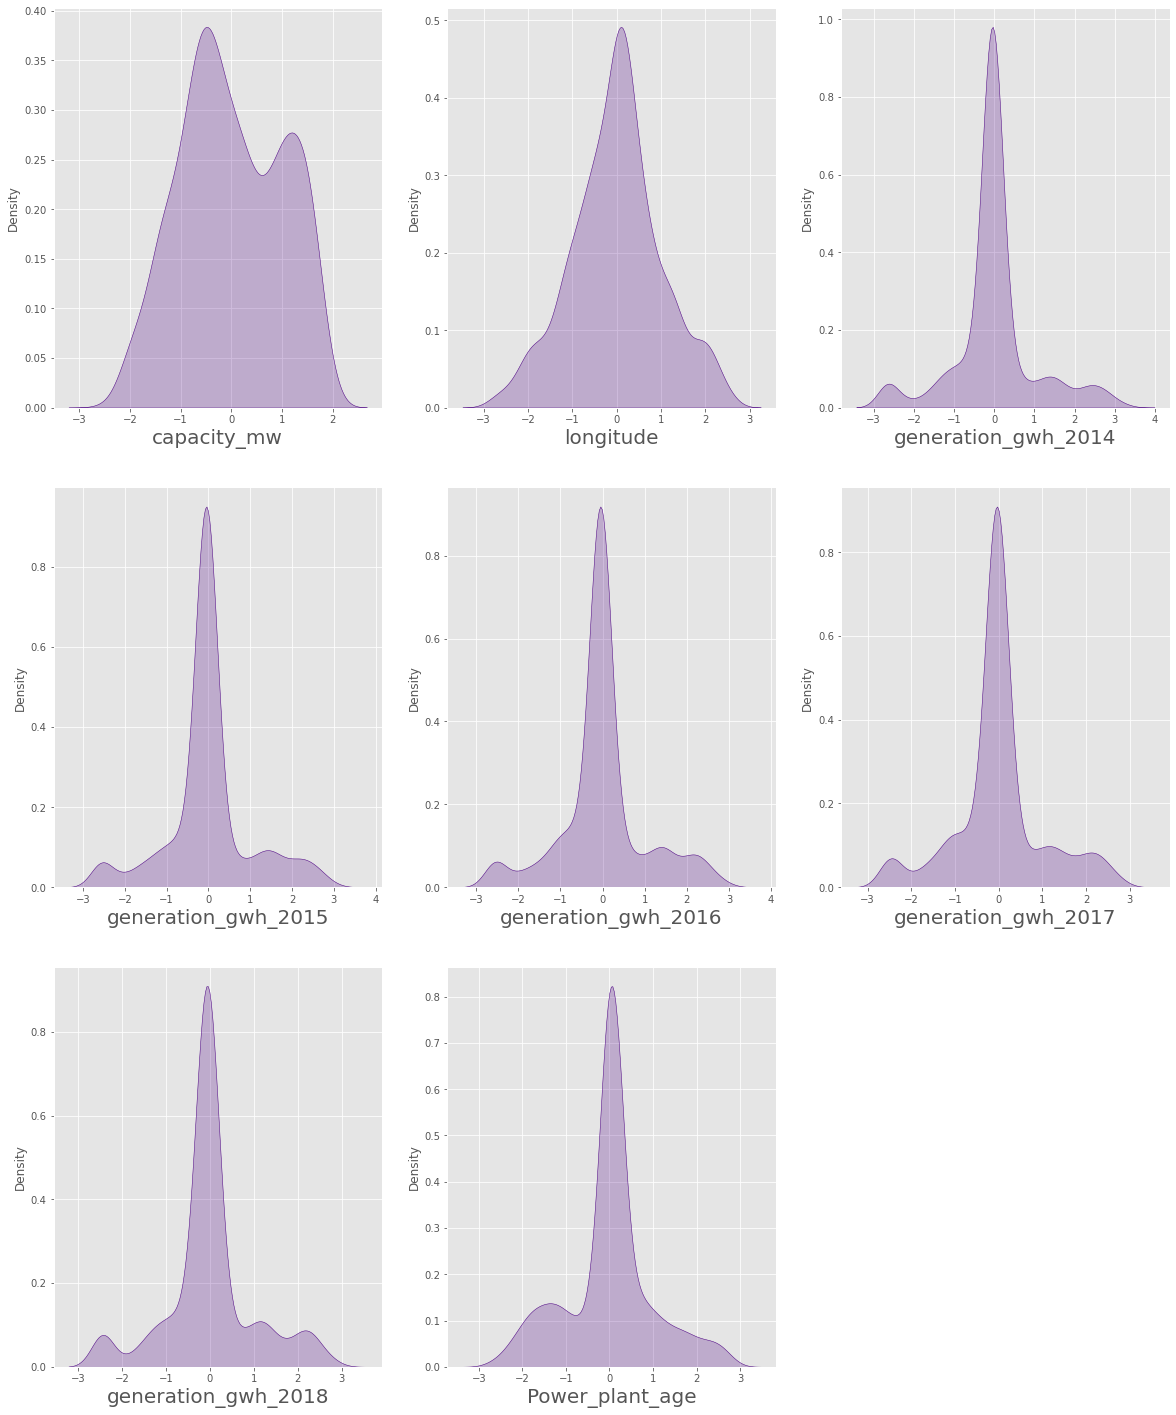

In [117]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is not normal but we can notice the skewness has been removed.

# Feature Scaling using Standard Scalarization

In [118]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df), columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


I have scaled the data using standard scalarizaion method to overcome with the issue of data biasness.

As we have observed in the heat map there is multicollinearity issue exists in the data, So let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns.

# Checking VIF values

In [119]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns

# Let's check the values
vif

,VIF values,Features
0,1.811775,capacity_mw
1,1.193670,longitude
2,1.413037,source
3,1.590869,geolocation_source
4,3.621608,generation_gwh_2014
5,6.190754,generation_gwh_2015
6,9.961303,generation_gwh_2016
7,9.767170,generation_gwh_2017
8,8.961146,generation_gwh_2018
9,1.153813,Power_plant_age


The VIF value is less than 10 in all the columns which means we are free from multicollinearity problem.

In [120]:
y_df.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: Fuel_Type, dtype: int64

we can observe that the target variable Fuel_Type has multi classes means it is a multiclassification problem. Also the data is not balanced so we will use iversampling method to balance the data.

# Oversampling

In [121]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_df, y_df = SM.fit_resample(x_df,y_df)

In [122]:
y_df.value_counts()

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: Fuel_Type, dtype: int64

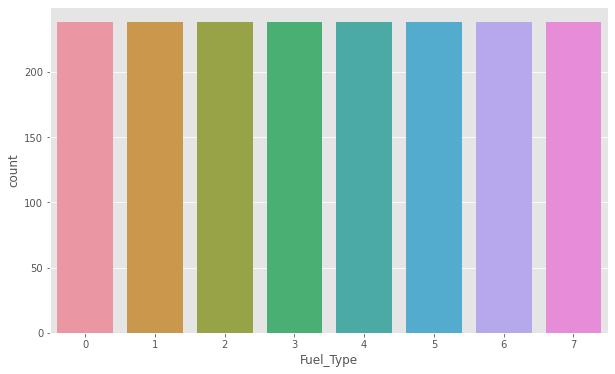

In [123]:
# Visualize the data after balancing
plt.figure(figsize=(10,6))
sns.countplot(y_df)
plt.show()

We can clearly visualize the data in all the types are equal.

# Modeling

# Finding best random state

In [124]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train, y_df_train)
    pred = DTC.predict(x_df_test)
    acc=accuracy_score(y_df_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8968531468531469  on Random_state  175


# Creating train_test split

In [125]:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.30,random_state=maxRS)

In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

# Decision Tree Classifier

In [127]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)

#Prediction
predDTC = DTC.predict(x_df_test)

print(accuracy_score(y_df_test, predDTC))
print(confusion_matrix(y_df_test, predDTC))
print(classification_report(y_df_test,predDTC))

0.8916083916083916
[[73  1  1  0  0  0  0  0]
 [ 2 50  6  8  1  3  0  0]
 [ 0  4 62  2  0  7  0  0]
 [ 0  5 12 58  2  0  0  0]
 [ 0  3  0  3 62  0  0  0]
 [ 0  1  1  0  0 68  0  0]
 [ 0  0  0  0  0  0 73  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.78      0.71      0.75        70
           2       0.76      0.83      0.79        75
           3       0.82      0.75      0.78        77
           4       0.95      0.91      0.93        68
           5       0.87      0.97      0.92        70
           6       1.00      1.00      1.00        73
           7       1.00      1.00      1.00        64

    accuracy                           0.89       572
   macro avg       0.89      0.89      0.89       572
weighted avg       0.89      0.89      0.89       572



we are getting 89% accuracy using Decision Tree Classifier.

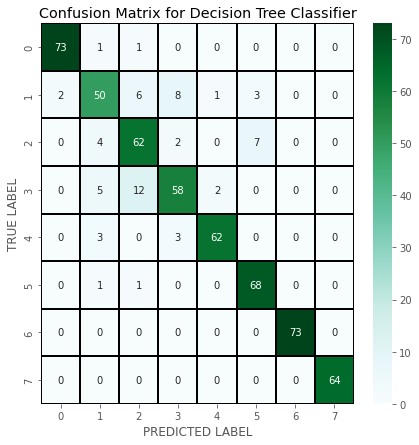

In [128]:
# Lets plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,predDTC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

# Random Forest Classifier

In [129]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)

# Prediction
predRFC = RFC.predict(x_df_test)

print(accuracy_score(y_df_test, predRFC))
print(confusion_matrix(y_df_test, predRFC))
print(classification_report(y_df_test,predRFC))

0.9090909090909091
[[73  1  0  0  0  0  0  1]
 [ 3 48  6  8  4  1  0  0]
 [ 0  1 68  0  0  6  0  0]
 [ 0  4 12 59  2  0  0  0]
 [ 0  0  0  2 66  0  0  0]
 [ 0  1  0  0  0 69  0  0]
 [ 0  0  0  0  0  0 73  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        75
           1       0.87      0.69      0.77        70
           2       0.79      0.91      0.84        75
           3       0.86      0.77      0.81        77
           4       0.92      0.97      0.94        68
           5       0.91      0.99      0.95        70
           6       1.00      1.00      1.00        73
           7       0.98      1.00      0.99        64

    accuracy                           0.91       572
   macro avg       0.91      0.91      0.91       572
weighted avg       0.91      0.91      0.91       572



The Random Forest Classifier has accuracy 91%.

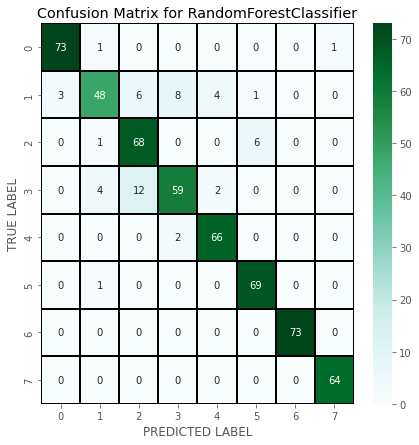

In [130]:
# Lets plot confusion matrix for RandomForestClassifier
cm = confusion_matrix(y_df_test,predRFC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

# Support Vector Machine Classifier

In [131]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_df_train,y_df_train)

# Prediction
predsvc = svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test,predsvc))

0.7832167832167832
[[66  0  0  0  0  1  0  8]
 [10 33  7  3  7  3  0  7]
 [ 0  6 48  1  2 14  0  4]
 [ 0  8 18 39  5  0  0  7]
 [ 0  0  0  1 67  0  0  0]
 [ 3  1  0  0  0 60  0  6]
 [ 0  0  0  0  0  0 73  0]
 [ 0  0  2  0  0  0  0 62]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        75
           1       0.69      0.47      0.56        70
           2       0.64      0.64      0.64        75
           3       0.89      0.51      0.64        77
           4       0.83      0.99      0.90        68
           5       0.77      0.86      0.81        70
           6       1.00      1.00      1.00        73
           7       0.66      0.97      0.78        64

    accuracy                           0.78       572
   macro avg       0.79      0.79      0.77       572
weighted avg       0.79      0.78      0.77       572



The accuracy using Support Vector Machine Classifier is 78%.

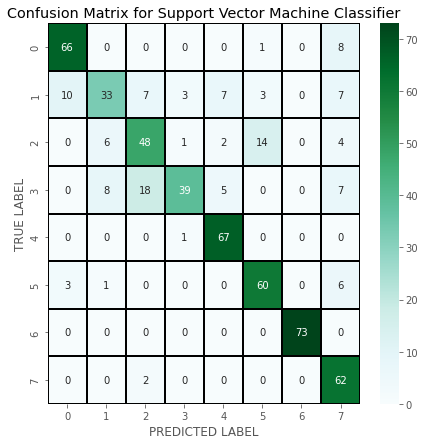

In [132]:
# Lets plot confusion matrix for Support Vector Machine Classifier
cm = confusion_matrix(y_df_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Support Vector Machine Classifier')
plt.show()

# KNeighbors Classifier

In [133]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_df_train,y_df_train)

# Prediction
predknn = knn.predict(x_df_test)

print(accuracy_score(y_df_test, predknn))
print(confusion_matrix(y_df_test, predknn))
print(classification_report(y_df_test,predknn))

0.8513986013986014
[[72  0  0  0  0  0  0  3]
 [ 8 36  7  7  5  4  0  3]
 [ 0  1 63  0  0 10  0  1]
 [ 0  8 15 49  0  1  0  4]
 [ 0  0  1  1 66  0  0  0]
 [ 1  0  5  0  0 64  0  0]
 [ 0  0  0  0  0  0 73  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        75
           1       0.80      0.51      0.63        70
           2       0.69      0.84      0.76        75
           3       0.86      0.64      0.73        77
           4       0.93      0.97      0.95        68
           5       0.81      0.91      0.86        70
           6       1.00      1.00      1.00        73
           7       0.85      1.00      0.92        64

    accuracy                           0.85       572
   macro avg       0.85      0.85      0.85       572
weighted avg       0.85      0.85      0.84       572



The accuracy using KNN is 85%.

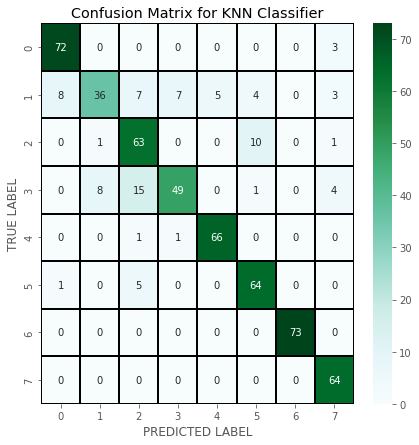

In [134]:
# Lets plot confusion matrix for KNN Classifier
cm = confusion_matrix(y_df_test,predknn)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

# Bagging Classifier

In [135]:
# Checking accuracy for BaggingClassifier
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_df_train,y_df_train)

# Prediction
predBC = BC.predict(x_df_test)

print(accuracy_score(y_df_test, predBC))
print(confusion_matrix(y_df_test, predBC))
print(classification_report(y_df_test,predBC))

0.8986013986013986
[[73  1  1  0  0  0  0  0]
 [ 2 52  3  8  2  3  0  0]
 [ 0  4 61  2  0  8  0  0]
 [ 0  5 14 57  1  0  0  0]
 [ 0  0  0  3 65  0  0  0]
 [ 0  1  0  0  0 69  0  0]
 [ 0  0  0  0  0  0 73  0]
 [ 0  0  0  0  0  0  0 64]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.83      0.74      0.78        70
           2       0.77      0.81      0.79        75
           3       0.81      0.74      0.78        77
           4       0.96      0.96      0.96        68
           5       0.86      0.99      0.92        70
           6       1.00      1.00      1.00        73
           7       1.00      1.00      1.00        64

    accuracy                           0.90       572
   macro avg       0.90      0.90      0.90       572
weighted avg       0.90      0.90      0.90       572



The accuracy using 90% usiing Bagging classifier.

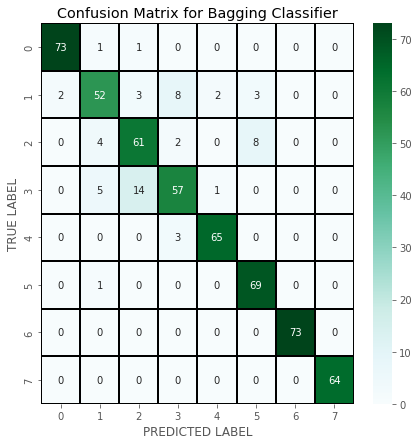

In [136]:
# Lets plot confusion matrix for Bagging Classifier
cm = confusion_matrix(y_df_test,predBC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bagging Classifier')
plt.show()

In [137]:
# Checking accuracy for Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR.fit(x_df_train,y_df_train)

# Prediction
predLR = LR.predict(x_df_test)

print(accuracy_score(y_df_test, predLR))
print(confusion_matrix(y_df_test, predLR))
print(classification_report(y_df_test,predLR))

0.715034965034965
[[67  0  0  0  0  1  0  7]
 [ 7 33  6  6 10  2  0  6]
 [ 1 11 23 12  9 16  0  3]
 [ 0  9 11 30  8  4  0 15]
 [ 0  1  0  0 67  0  0  0]
 [ 1  2  0  0  0 61  0  6]
 [ 0  1  0  0  0  0 72  0]
 [ 0  0  0  8  0  0  0 56]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89        75
           1       0.58      0.47      0.52        70
           2       0.57      0.31      0.40        75
           3       0.54      0.39      0.45        77
           4       0.71      0.99      0.83        68
           5       0.73      0.87      0.79        70
           6       1.00      0.99      0.99        73
           7       0.60      0.88      0.71        64

    accuracy                           0.72       572
   macro avg       0.70      0.72      0.70       572
weighted avg       0.70      0.72      0.69       572



The accuracy using logistic regresssion is 72%

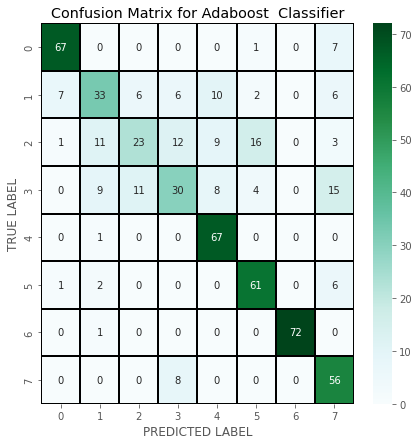

In [138]:
# Lets plot confusion matrix logistic Classifier
cm = confusion_matrix(y_df_test,predLR)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Adaboost  Classifier')
plt.show()

# Checking the Cross Validation Score

In [140]:
from sklearn.model_selection import cross_val_score

In [141]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x_df,y_df,cv=5).mean())

0.8671266749551043


In [142]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x_df,y_df,cv=5).mean())

0.9175480038679377


In [143]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

0.7888603398259427


In [145]:
# cv score for KNN Classifier
print(cross_val_score(knn,x_df,y_df,cv=5).mean())

0.8576709490261084


In [146]:
# cv score for banging Classifier
print(cross_val_score(BC,x_df,y_df,cv=5).mean())

0.8975935902748999


In [147]:
# cv score for LR classffier
print(cross_val_score(LR,x_df,y_df,cv=5).mean())

0.7184763088824423


from the difference between accuracy score and cross validation score the KNN classifier is best fitting model.

# Hyperparameter Tuning

In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
# KNN classifier
parameters = {'n_neighbors':[2,3,4,5,6],
              'weights':['uniform','distance'],
              'leaf_size':[10,100],
              'algorithm':['auto','ball_tree','kd_tree','brute']}

In [150]:
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [151]:
GCV.fit(x_df_train,y_df_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 100], 'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [152]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 2, 'weights': 'distance'}

In [153]:
fuel_type = KNN(algorithm='auto', leaf_size=10, n_neighbors=2, weights='distance')

fuel_type.fit(x_df_train, y_df_train)
pred = fuel_type.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

87.93706293706293


After hyper tunning model the accuracy incresed to 87%

# Plotting ROC and compare AUC for the final model

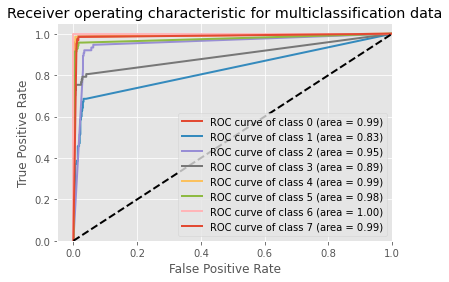

In [154]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


classifier = OneVsRestClassifier(fuel_type)
y_score = classifier.fit(x_df_train, y_df_train).predict_proba(x_df_test)

#Binarize the output
y_df_test_bin  = label_binarize(y_df_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_df_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()


In [155]:
# Saving the model using .pkl
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_Fuel_Type.pkl")

['Global_Power_Plant_Fuel_Type.pkl']

# Predicting the saved model

In [156]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Global_Power_Plant_Fuel_Type.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 2, 3, 2, 3, 3, 1, 7, 2, 1, 5, 3, 1, 1, 1, 1, 1, 6, 2, 7, 6, 6,
       7, 3, 3, 1, 1, 5, 5, 6, 6, 6, 1, 3, 5, 1, 1, 6, 3, 2, 3, 7, 1, 3,
       0, 1, 2, 6, 0, 6, 6, 3, 1, 7, 2, 1, 3, 3, 1, 6, 3, 4, 1, 1, 3, 2,
       6, 3, 1, 4, 7, 6, 3, 3, 1, 6, 0, 6, 3, 7, 1, 7, 3, 2, 7, 5, 2, 3,
       0, 1, 5, 1, 5, 3, 2, 5, 1, 3, 3, 2, 3, 4, 6, 6, 3, 2, 1, 2, 6, 7,
       6, 6, 1, 3, 3, 1, 2, 6, 2, 1, 3, 3, 6, 3, 3, 1, 3, 1, 1, 3, 1, 1,
       1, 3, 2, 5, 5, 1, 2, 5, 1, 6, 5, 5, 2, 4, 6, 6, 3, 7, 2, 3, 3, 6,
       5, 3, 2, 6, 2, 5, 3, 2, 5, 6, 7, 6, 5, 6, 7, 1, 1, 3, 3, 6, 5, 3,
       7, 1, 2, 7, 5, 7, 5, 6, 1, 1, 1, 1, 3, 0, 3, 2, 3, 6, 3, 2, 1, 1,
       1, 4, 1, 3, 3, 6, 3, 2, 5, 1, 3, 3, 3, 2, 3, 6, 3, 3, 7, 6, 5, 2,
       3, 3, 3, 2, 3, 7, 7, 1, 3, 1, 0, 1, 3, 7, 4, 5, 6, 7, 1, 4, 1, 1,
       1, 3, 7, 1, 6, 7, 3, 1, 6, 5, 1, 3, 1, 1])